**Examples**

The Empire State Building Strikes Back

In [1]:
try:
    from pint import UnitRegistry
except ImportError:
    !pip install pint

# import units
from pint import UnitRegistry
units = UnitRegistry()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.0/294.0 kB 3.9 MB/s eta 0:00:00


In [2]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)
download('https://raw.githubusercontent.com/AllenDowney/' +
         'ModSimPy/master/modsim.py')

Downloaded modsim.py


In [3]:
from modsim import *

Dropping Pennies

In [4]:
init = State(y=350, v=0)
system = System(init=init,
                g=5.5,
                t_end=30)
def slope_function(t, state, system):
    y, v = state
    dydt = v
    dvdt = -system.g

    return dydt, dvdt
dydt, dvdt = slope_function(0, system.init, system)
dydt, dvdt

(0, -5.5)

In [5]:
results, details = run_solve_ivp(system, slope_function)
details.message

'The solver successfully reached the end of the integration interval.'

In [6]:
results.head()

,y,v
0.0,350.0000,0.00
0.3,349.7525,-1.65
0.6,349.0100,-3.30
0.9,347.7725,-4.95
1.2,346.0400,-6.60


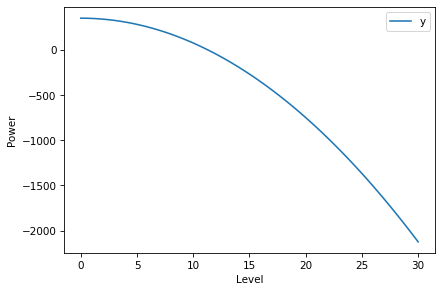

In [7]:
results.y.plot()

decorate(xlabel='Level',
         ylabel='Power')

In [8]:
results.iloc[-1].y

-2124.9999999999973

In [9]:
t_crossings = crossings(results.y, 0)
t_crossings

array([11.2815215])

Events

In [10]:
def event_function(t, state, system):
    y, v = state
    return y
results, details = run_solve_ivp(system, slope_function, events=event_function)
details.message

'A termination event occurred.'

In [11]:
t_end = results.index[-1]
t_end

11.281521496355323

In [12]:
y, v = results.iloc[-1]
y, v

(5.684341886080802e-14, -62.048368229954285)

**Exercises**

Exercise 1

In [13]:
r_0 = 150e9
v_0 = 0
init = State(r=r_0,
             v=v_0)
radius_p1 = 6.37e6
radius_p2 = 696e6
r_final = radius_p2 + radius_p1
r_final

702370000.0

In [14]:
t_end = 1e7

system = System(init=init,
                G=4.12e-9,
                m1=1.5e10,
                m2=9.2e12,
                r_final=radius_p2 + radius_p1,
                t_end=t_end)
def universal_gravitation(state, system):
    r, v = state
    G, m1, m2 = system.G, system.m1, system.m2
    force = G * m1 * m2 / r**2
    return force
universal_gravitation(init, system)

2.5269333333333335e-08

In [15]:
def slope_function(t, state, system):
    y, v = state
    m2 = system.m2
    force = universal_gravitation(state, system)
    dydt = v
    dvdt = -force / m2

    return dydt, dvdt
slope_function(0, system.init, system)

(0.0, -2.7466666666666667e-21)

In [16]:
def event_function(t, state, system):
    r, v = state
    return r - system.r_final
event_function(0, init, system)

149297630000.0

In [17]:
results, details = run_solve_ivp(system, slope_function, events=event_function)
details.message

'The solver successfully reached the end of the integration interval.'

In [18]:
t_event = results.index[-1]
t_event

10000000.0

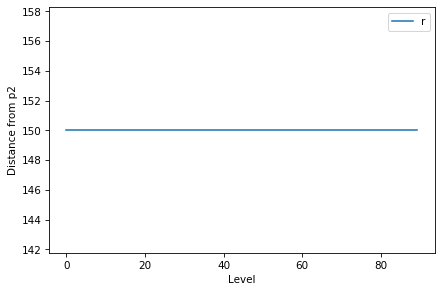

In [19]:
seconds = t_event * units.second
days = seconds.to(units.day)
results.index /= 40 * 70 * 40
results.r /= 1e9
results.r.plot(label='r')

decorate(xlabel='Level',
         ylabel='Distance from p2')